In [11]:
#Begin with imports
import timeit
import os
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("display.precision", 2) #floats displayed 3 digits
cpallet = ["#6CC860","#8CC860","#C4E54C","#F7DD48","#F5A232","#FC8609","#FE6315"]*3
import matplotlib.pyplot as plot
plot.rcParams['svg.fonttype'] = 'none'
import scipy.stats as stats
from labellines import labelLine, labelLines

#Set paths and get all the XLS tables to be analyzed
print(os.getcwd())
samplename = "comm6-summary"
os.chdir("/mnt/scratch/freeman/comm6summary/finaldata")
files = os.listdir(os.getcwd())
files = [f for f in files if f[-5:] == ".xlsx"]
files.sort()

prefix = [f[:-5] for f in files]
prefix #prefix is used to keep track of samples and for naming file

/mnt/scratch/freeman/comm6summary/finaldata


['24-1-comm6psg0',
 '24-2-comm6psg0',
 '28-1-psg1erm',
 '28-3-psg1erm',
 '28-6-psg2erm',
 '28-7-psg2erm']

In [21]:
#import data from SAM parser 
dfs = []
for p in prefix:
    dfs.append(pd.read_excel(f"{p}.xlsx", index_col = 0))

In [22]:
#Quality check on multiple encapsulations with 16S reads
#isolate 16S portion of the df to decide which barcodes contain multiple species/cells
rdfs = []
for i in range(len(dfs)):
    cols = dfs[i].columns
    #get only 16S
    cols = [x for x in cols if x.find("16S-") != -1]
    rdfs.append(dfs[i].reindex(columns = cols))

rdfs[0]

,16S-AC_NGS_UW,16S-BA_Sanger_UW_agreesNGS,16S-BC_sanger_UW,16S-BF_Sanger_UW,16S-BH10507,16S-BL_sanger_UW,16S-BO_c,16S-BP_sanger_UW,16S-BPum_ncbi,16S-BT_c,...,16S-DF_Sanger_UW,16S-DL_NGS_UW,16S-DP,16S-EL25559,16S-ER_c,16S-FP17677,16S-PC_c,16S-PJ_NGS_UW,16S-RI_Sanger_UW_agreesiwthNGS,16S-e.coli
ACTTAGAAGTTACAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,212,0,0,0,0,0
CACTTAGGAGACTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAGAATACGCCATTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,0
ACCTCTAATTTTAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,0,0
ACTAAGAGTGGGCAC,0,0,155,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAATCAGAGATC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
AAACCATTACCAGAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACCATCCGGTGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,97,0,0,0,0,0,0
CCAGGAACGTGTTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,91,0,0,0,0,0,0


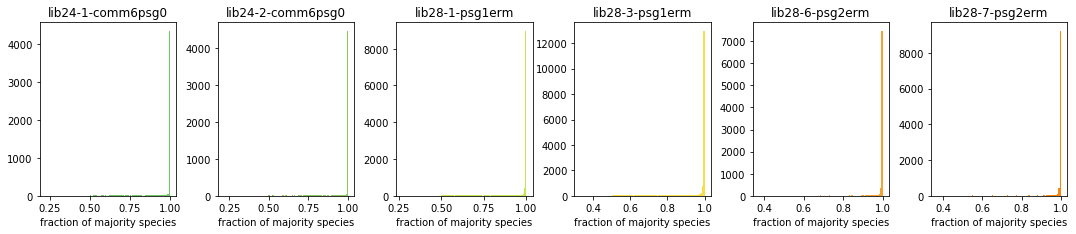

In [23]:
#check how contaminated the barcodes are, plot the fraction 16S that map to the majority species per barcode group as a histogram
#purity = 1.0 means that group had only one species in it

fig, axs = plot.subplots(1,len(dfs), figsize = (15, 3))
fig.tight_layout()

for i in range(len(dfs)):
    df = rdfs[i]
    df = df.div(df.sum(axis=1), axis=0)
    purity = []
    for index, row in df.iterrows():
        purity.append(max(row))
    ax = axs[i]
    ax.hist(purity, bins = 99, color = cpallet[i])
    #ax.set_yscale("log")
    ax.set_title(f"lib{prefix[i]}")
    ax.set_xlabel("fraction of majority species")
    
#here it seems like most bargroups are uncontaminated (>99% purity), which is what we want.

<ipython-input-27-321120c7f7d4>:17: RuntimeWarning: invalid value encountered in long_scalars
  sa_ratio[TARG].append((a/(s+a)))
<ipython-input-27-321120c7f7d4>:19: RuntimeWarning: invalid value encountered in long_scalars
  sa_ratio[TARG] = [a/(s+a)]


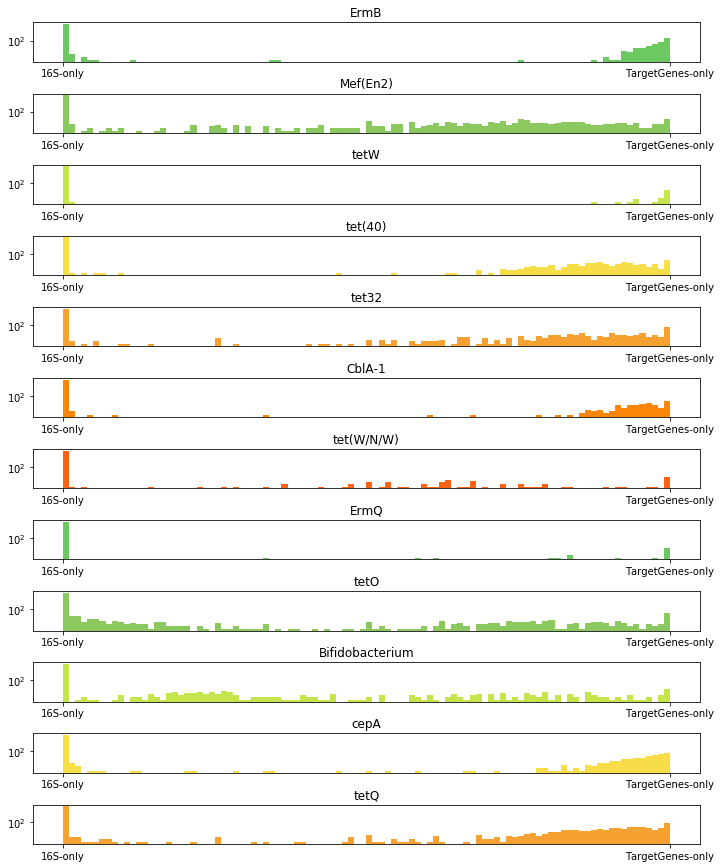

In [27]:
#Looking at the balance between taxanomic marker gene coverage and target gene coverage 
#to assess whether primer ratios need to be adjusted
lib = 0 #the library to plot the primer ratios for

#Generate the ratio between taxonomic marker gene and target genes in each cell for each gene
dfsSA = []
for i in range(len(dfs)):
    df = dfs[i]
    species = [x for x in df.columns if x.find("16S") != -1]
    TARGs = [x for x in df.columns if x.find("16S") == -1]
    sa_ratio = {}
    for index, row in df.iterrows():
        s = sum(row.loc[species])
        for TARG in TARGs:    
            a = row.loc[TARG]
            if TARG in sa_ratio:
                sa_ratio[TARG].append((a/(s+a)))
            else:
                sa_ratio[TARG] = [a/(s+a)]
    dfsSA.append(pd.DataFrame(sa_ratio))

#now I gotta plot it all out
df = dfsSA[lib]
cols = df.columns
l = len(cols)

fig, axs = plot.subplots(l,1, figsize = (10, 1*l))
fig.tight_layout()
for i in range(l):
    ax = axs[i]
    ax.hist(df[cols[i]], bins = 100, color = cpallet[i])
    ax.set_yscale("log")
    ax.set_title(cols[i])
    ax.set_xticks([0,1])
    ax.set_xticklabels(["16S-only", "TargetGenes-only"])
    

In [28]:
#Final QC and transformation of data into a summary table that counts # of cells and the genes detected in them

#Summary table as a function:
#1. takes any df, normalizes it
#2. removes 16S columns and add the species name as a column
#3. discretizes presence/absence based on cutoff
#4. makes summary table

def summarytable(df, cutoff):
    #1. normalizes df
    df = df.div(df.sum(axis=1), axis=0)
    #2. removes 16S columns and add the species name as a column
    #generate 16S only subdf
    species = [s for s in df.columns if s.find("16S") != -1]
    df16S = df.reindex(columns = species)
    #find the identity of the species for that barcode
    specieslist = []
    for index, row in df16S.iterrows():
        specieslist.append(df16S.columns[list(row).index(max(row))])  #find the max 16S column        
    #3. discretizes df based on cutoff
    df = df.applymap(lambda x: 0 if x <= cutoff else 1)
    #now add the species to the dfs
    df['species'] = specieslist
    #now remove the 16S columns
    ARGs = [g for g in df.columns if g.find("16S") == -1 ]
    df = df.reindex(columns = ARGs)
    #4 make summary table using splitspecies
    splitspecies = df.groupby(df["species"], squeeze = True)
    #make a new df based on groups
    df = splitspecies.sum()
    #grab the total # of groups in each species
    totlist = []
    for s, d in splitspecies:
        totlist.append(len(d))
    #add this to the new df as a column
    df["num_cells"] = totlist
    #get the gene hits as fraction of total
    df = df.div(df["num_cells"], axis=0)    
    #reinstate the total again (since it got normalized)
    df["num_cells"] = totlist
    return df 

In [29]:
#Run above function on the libraries

summary = []
n = 10 #minimum number of 16S reads required in the barcode group to be considered for analysis
puritycutoff = 0.99 #the cutoff for 16S purity for saying a barcode group contains only one cell 
cutoff = 0.01 #the cutoff for discretization (for saying a target gene is "present")

for i in range(len(dfs)):
    df = dfs[i]
    print(f"library {prefix[i]} \n pre-cutoff # of barcodes", len(df))
    #filter the library by the 16S portion of the reads and only take the groups of reads that pass purity cutoffs
    species = [x for x in df.columns if x.find("16S") != -1]
    ilist = [] 
    for index, row in df.iterrows():
        s = row.loc[species]
        if sum(s) > 0: #ignore the ones w/o 16S reads
            if max(s) / sum(s) >= puritycutoff and max(s) >= n: #there purity is 100% and it's more than 3 reads (100% purity is best, 1-5 reads dont' change much)
                ilist.append(index)
    df = df.reindex(index = ilist) #reindex to obtain purified df
    print(f"post-cutoff for there's only 1 16S target found and at least {n} 16S reads \n", len(df))
    
    summary.append(summarytable(df, cutoff))
    
        
        

library 24-1-comm6psg0 
 pre-cutoff # of barcodes 5430
post-cutoff for there's only 1 16S target found and at least 10 16S reads 
 3861
library 24-2-comm6psg0 
 pre-cutoff # of barcodes 5500
post-cutoff for there's only 1 16S target found and at least 10 16S reads 
 4120
library 28-1-psg1erm 
 pre-cutoff # of barcodes 13071
post-cutoff for there's only 1 16S target found and at least 10 16S reads 
 8746
library 28-3-psg1erm 
 pre-cutoff # of barcodes 18971
post-cutoff for there's only 1 16S target found and at least 10 16S reads 
 12841
library 28-6-psg2erm 
 pre-cutoff # of barcodes 9163
post-cutoff for there's only 1 16S target found and at least 10 16S reads 
 7642
library 28-7-psg2erm 
 pre-cutoff # of barcodes 11452
post-cutoff for there's only 1 16S target found and at least 10 16S reads 
 9376


In [30]:
#fix species names (this has to do with the way the marker genes are named in the database)
for i in range(len(dfs)):
    df = summary[i]
    ilist = df.index
    nlist = []
    for j in ilist:
        nlist.append(j[4:6])
    df.index = nlist

#drop species that have < than n cells to remove low statistics groups
for i in range(len(dfs)):
        summary[i] = summary[i][summary[i]["num_cells"] >= 10]
        
#OPTIONAL: drop the e. species (it's e. coli a contaminant in our lab that sometimes shows up in our libraries)
for i in range(len(dfs)):
    try:
        summary[i] = summary[i].drop("e.")
    except:
        continue


In [173]:
#export dataframe to excel sheet
with pd.ExcelWriter(f'{samplename}-summarytables.xlsx') as writer:  
    for i in range(len(summary)):
        summary[i].to_excel(writer, sheet_name = prefix[i])

In [ ]:
#############################BELOW ARE FUNCTIONS USED TO PLOT THE GRAPHS IN THE FIGURES IN THE PAPER########################

SpearmanrResult(correlation=-0.571491406178173, pvalue=6.500852086876776e-10)


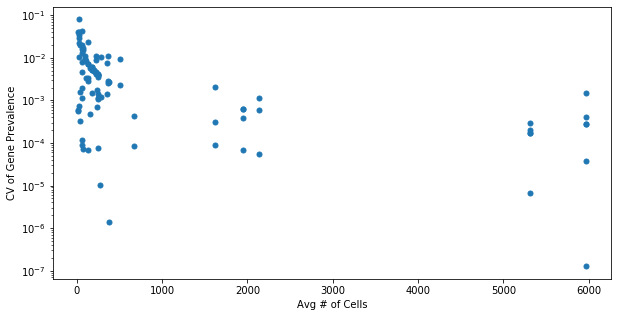

In [92]:
#to plot variance vs avg # of cells, I'm going to have to get the variance of each SPECIES/ARG combo and the avg # of cells for taht species
#there might be a pandas option to do this automatically

fig, axs = plot.subplots(1,1, figsize = (10, 5))

#go through each of the conditions, it's duplicates for each, get the average and the cvs for the replicates 
allcvs = []
allavgs = []
for i in [0,2,4]:
    s = pd.concat(summary[i:i+2])
    avg = s.groupby(level=0).mean() #get the avgs for each entry
    var = s.groupby(level=0).var()
    cv = var/avg
    allavgs.append(avg)
    allcvs.append(cv)
avg = pd.concat(allavgs)
cv = pd.concat(allcvs)

#plot the cv vs the # cells for each
#get data for each point

#make the df where the genes are in cvs, but the # of cells is in averages for plotting
df = cv
df["num_cells"] = avg["num_cells"]

cvs = []
numcells = []
for j, row in df.iterrows():
    for idx in row.drop("num_cells").index:
        if row[idx] > 0: #skip NaNs
            cvs.append(row[idx])
            numcells.append(row["num_cells"])

            
axs.plot(numcells, cvs, linestyle = "", ms = 10, marker = ".", label = f"{files[i]}")
axs.set_yscale("Log")
#axs.tick_params(axis='x', labelrotation = 90)
axs.set_ylabel("CV of Gene Prevalence")
axs.set_xlabel("Avg # of Cells")
#axs.set_ylim((0, 1))
#axs.legend()
fig.savefig("CV-vs-#Cells.svg", format = "svg")

print(stats.spearmanr(numcells, cvs))


In [99]:
#Combine cell abundances over time for every species in the passaging

#First normalize # of cells
for i in range(len(summary)):
    summary[i]["num_cells"] = summary[i]["num_cells"].div(sum(summary[i]["num_cells"]))

#combine summary into one big multiindex dataframe
keys = ["psg0-rep1","psg0-rep2","psg1-rep1","psg1-rep2","psg2-rep1","psg2-rep2"]
multidf = pd.concat(summary, keys = keys,axis=0).reset_index(level=1)
#make it a multindex
multidf["psg"] = [x.split("-")[0] for x in multidf.index]
multidf["rep"] = [x.split("-")[1] for x in multidf.index]
multidf["species"] = [x for x in multidf["level_1"]]
multidf = multidf.set_index(["psg", "rep", "species"])

#impute all the missing values as 0 for all the index combinations
new_index = pd.MultiIndex.from_product(multidf.index.levels)
multidf = multidf.reindex(new_index).fillna(1e-4) #fill 0s with pseudozero

#export as excel to deal with it
#multidf.to_csv("multidf.csv")
multidf

level_1      ErmB  Mef(En2)      tetW   tet(40)     tet32  \
psg  rep  species                                                             
psg0 rep1 AC           AC  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00   
          BA           BA  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00   
          BC           BC  0.00e+00  0.00e+00  0.00e+00  2.72e-03  0.00e+00   
          BF           BF  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00   
          BH           BH  7.72e-01  0.00e+00  0.00e+00  0.00e+00  7.32e-01   
...                   ...       ...       ...       ...       ...       ...   
psg2 rep2 ER       0.0001  1.00e-04  1.00e-04  1.00e-04  1.00e-04  1.00e-04   
          FP       0.0001  1.00e-04  1.00e-04  1.00e-04  1.00e-04  1.00e-04   
          PC       0.0001  1.00e-04  1.00e-04  1.00e-04  1.00e-04  1.00e-04   
          PJ           PJ  1.00e-04  5.24e-01  0.00e+00  1.00e-04  1.00e-04   
          RI       0.0001  1.00e-04  1.00e-04  1.00e-04  1.00e-04  1.00e-04   

                     CblA-1  tet(W/N/W)      ErmQ      tetO  Bifidobacterium  \
psg  rep  species                                                              
psg0 rep1 AC       0.00e+00    0.00e+00  0.00e+00  8.05e-01         0.00e+00   
          BA       0.00e+00    0.00e+00  0.00e+00  0.00e+00         7.33e-01   
          BC       2.72e-03    0.00e+00  0.00e+00  0.00e+00         0.00e+00   
          BF       0.00e+00    0.00e+00  0.00e+00  0.00e+00         0.00e+00   
          BH       0.00e+00    0.00e+00  0.00e+00  0.00e+00         0.00e+00   
...                     ...         ...       ...       ...              ...   
psg2 rep2 ER       1.00e-04    1.00e-04  1.00e-04  1.00e-04         1.00e-04   
          FP       1.00e-04    1.00e-04  1.00e-04  1.00e-04         1.00e-04   
          PC       1.00e-04    1.00e-04  1.00e-04  1.00e-04         1.00e-04   
          PJ       1.00e-04    1.00e-04  0.00e+00  0.00e+00         0.00e+00   
          RI       1.00e-04    1.00e-04  1.00e-04  1.00e-04         1.00e-04   

                       cepA      tetQ  num_cells  
psg  rep  species                                 
psg0 rep1 AC       0.00e+00  0.00e+00   3.55e-02  
          BA       0.00e+00  0.00e+00   1.20e-02  
          BC       0.00e+00  0.00e+00   9.79e-02  
          BF       8.53e-01  0.00e+00   4.16e-02  
          BH       0.00e+00  0.00e+00   3.39e-02  
...                     ...       ...        ...  
psg2 rep2 ER       1.00e-04  1.00e-04   1.00e-04  
          FP       1.00e-04  1.00e-04   1.00e-04  
          PC       1.00e-04  1.00e-04   1.00e-04  
          PJ       0.00e+00  4.76e-01   2.24e-03  
          RI       1.00e-04  1.00e-04   1.00e-04  

[150 rows x 14 columns]

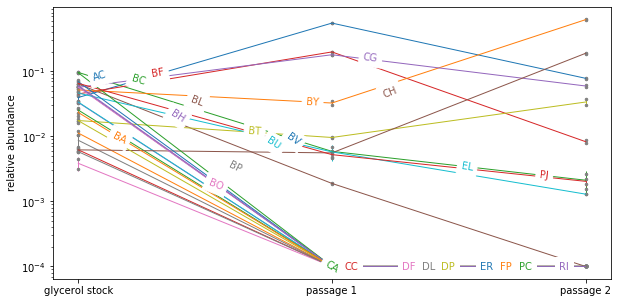

In [85]:
#plot the abundance curves over passages
#for each passage, grab the data of averaged reps for all species
meandfs = []
for psg, df in multidf.groupby(level = 0):
    meandfs.append(df.groupby("species").mean())

meandf = pd.concat(meandfs, keys = [0,1,2])

#get error bars (stdevs) for each data point
stdevdfs = []
for psg, df in multidf.groupby(level = 0):
    stdevdfs.append(df.groupby("species").std())

stdevdf = pd.concat(stdevdfs, keys = [0,1,2])

#grab the species and num cells for each meandf and plot
freqdict = {}
for s, df in meandf.groupby("species"):
    freqdict[s] = list(df["num_cells"])

#grab the species and num cells for each meandf and plot
stdevdict = {}
for s, df in stdevdf.groupby("species"):
    stdevdict[s] = list(df["num_cells"])

#plot it in pyplot
fig, axs = plot.subplots(1,1, figsize = (10, 5))

for s in freqdict:
    axs.errorbar(range(3), freqdict[s], yerr = stdevdict[s], label = s, marker = "o", ms =0, lw = 1)
   
axs.set_yscale("log")
axs.set_xticks([0,1,2])
axs.set_xticklabels(["glycerol stock", "passage 1", "passage 2"])
axs.set_ylabel("relative abundance")
#axs.legend()
labelLines(plot.gca().get_lines())

#plot the individual replicates datapoints
#grab the species and num cells for each meandf and plot
freqdict = {}
for s, df in multidf.groupby("species"):
    freqdict[s] = list(df["num_cells"])

for s in freqdict:
    axs.plot([0,0,1,1,2,2], freqdict[s], label = s, marker = ".", color = "grey", ms = 5, lw = 0)
    
    
fig.savefig("relabun.svg", format = "svg")

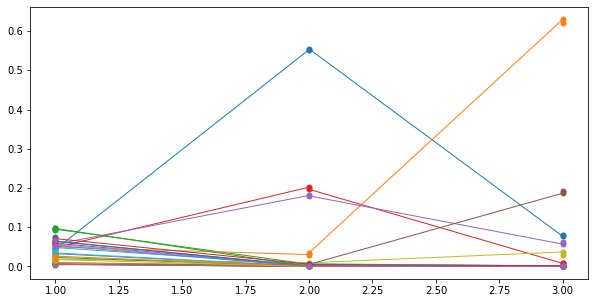

In [78]:
fig, axs = plot.subplots(1,1, figsize = (10, 5))

#grab the species and num cells for each meandf and plot
freqdict = {}
for s, df in multidf.groupby("species"):
    freqdict[s] = list(df["num_cells"])

for s in freqdict:
    axs.plot([1,1,2,2,3,3], freqdict[s], label = s, marker = "o", ms = 5, lw = 1)



/home/flan3@ad.wisc.edu/.conda/envs/default-FM/lib/python3.8/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


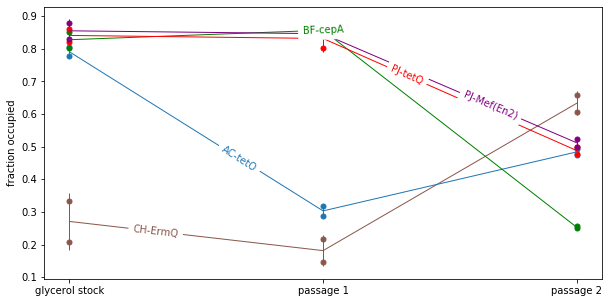

In [74]:
#plot certain ARG-SPecies combinations over passages
#grab certain ARG_species combinations
#combinations to look for: CH-ErmQ, AC-tetO, BF cepA, PJ, tetQ, PJ (Mef(En2))
combos = ["CH-ErmQ", "AC-tetO", "BF-cepA", "PJ-tetQ", "PJ-Mef(En2)"]
markers = {"CH-ErmQ":"o", "AC-tetO":"^", "BF-cepA":"p", "PJ-tetQ":"v", "PJ-Mef(En2)":"x"}
colors = {"CH-ErmQ":"#8c564b", "AC-tetO":"#1f77b4", "BF-cepA":"green", "PJ-tetQ":"red", "PJ-Mef(En2)":"purple"}

combodictmean = {}
#grab the specific combos mean
for psg, df in meandf.groupby(level=0):
    for c in combos:
        if c in combodictmean:
            combodictmean[c].append(df.loc[(psg, c.split("-")[0]), c.split("-")[1]])
        else:
            combodictmean[c] = [df.loc[(psg, c.split("-")[0]), c.split("-")[1]]]

#do the same for stdev
combodictstdev = {}
for psg, df in stdevdf.groupby(level=0):
    for c in combos:
        if c in combodictstdev:
            combodictstdev[c].append(df.loc[(psg, c.split("-")[0]), c.split("-")[1]])
        else:
            combodictstdev[c] = [df.loc[(psg, c.split("-")[0]), c.split("-")[1]]]

#plot it in pyplot
fig, axs = plot.subplots(1,1, figsize = (10, 5))

for c in combodictmean:
    axs.errorbar(range(3), combodictmean[c], yerr = combodictstdev[c], label = c, color = colors[c], marker = "", ms = 0, lw = 1)
    #axs.plot(range(3), combodictmean[c], label = c, color = colors[c], marker = "", ms = 0, lw = 1)

#axs.set_yscale("log")
axs.set_xticks([0,1,2])
axs.set_xticklabels(["glycerol stock", "passage 1", "passage 2"])
axs.set_ylabel("fraction occupied")
#axs.legend()        
labelLines(plot.gca().get_lines())


#now also plot datapoints for individual replicates
data = {}
df = multidf.reset_index(level=1).groupby(level=0)
for psg, d in df: #loop through each passage
    for c in combos: #loop each species-arg combo
        if c in data: #add the datapoint for that species-arg combo to the data to plot
            data[c].append(d.loc[(psg, c.split("-")[0]), c.split("-")[1]])
        else:
            data[c] = [d.loc[(psg, c.split("-")[0]), c.split("-")[1]]]
          
for c in data:
    axs.plot(range(3), data[c], label = c, marker = ".", color = colors[c], ms = 10, lw = 0)

    
fig.savefig("psgoccupancy.svg", format = "svg")

In [ ]:
#trying to plot the above with individual technical replicates as dots
#plot it in pyplot
fig, axs = plot.subplots(1,1, figsize = (10, 5))
data = {}

#grab the specific combos individual replicates and store it in data

df = multidf.reset_index(level=1).groupby(level=0)
for psg, d in df: #loop through each passage
    for c in combos: #loop each species-arg combo
        if c in data: #add the datapoint for that species-arg combo to the data to plot
            data[c].append(d.loc[(psg, c.split("-")[0]), c.split("-")[1]])
        else:
            data[c] = [d.loc[(psg, c.split("-")[0]), c.split("-")[1]]]

for c in combodictmean:
    axs.errorbar(range(3), combodictmean[c], yerr = combodictstdev[c], label = c, marker = "o", ms = 5, lw = 1)

#axs.set_yscale("log")
axs.set_xticks([0,1,2])
axs.set_xticklabels(["glycerol stock", "passage 1", "passage 2"])
axs.set_ylabel("fraction occupied")
#axs.legend()        
labelLines(plot.gca().get_lines())
fig.savefig("psgoccupancy.svg", format = "svg")

/home/flan3@ad.wisc.edu/.conda/envs/default-FM/lib/python3.8/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


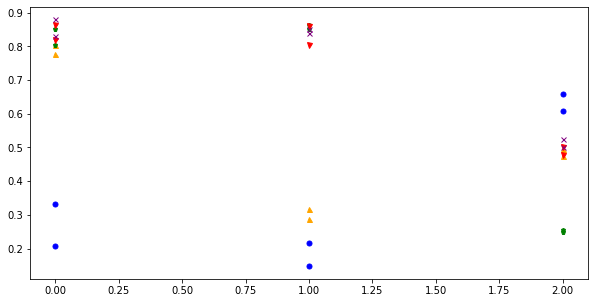

In [56]:
data = {}
df = multidf.reset_index(level=1).groupby(level=0)
for psg, d in df: #loop through each passage
    for c in combos: #loop each species-arg combo
        if c in data: #add the datapoint for that species-arg combo to the data to plot
            data[c].append(d.loc[(psg, c.split("-")[0]), c.split("-")[1]])
        else:
            data[c] = [d.loc[(psg, c.split("-")[0]), c.split("-")[1]]]
            

fig, axs = plot.subplots(1,1, figsize = (10, 5))

markers = {"CH-ErmQ":"o", "AC-tetO":"^", "BF-cepA":"p", "PJ-tetQ":"v", "PJ-Mef(En2)":"x"}
colors = {"CH-ErmQ":"blue", "AC-tetO":"orange", "BF-cepA":"green", "PJ-tetQ":"red", "PJ-Mef(En2)":"purple"}

for c in data:
    axs.plot(range(3), data[c], label = c, marker = markers[c], color = colors[c], ms = 5, lw = 0)


In [ ]:
#Plot the heatmap showing which cells have which genes at what fractions
fig, axs = plot.subplots(1, len(dfs), figsize = (10*len(dfs), 10))

#fig.tight_layout()

for i in range(len(dfs)):
    ax = axs[i]
    data = summary[i].drop(columns = "num_cells").round(2).transpose()   
    ax.imshow(data.values)
    ax.set_xticks(range(len(data.columns)))
    ax.set_yticks(range(len(data.index)))
    ax.set_xticklabels(data.columns, rotation = 90, ha = "center")
    ax.set_yticklabels(data.index)
    ax.set_title(files[i])
    for x in range(len(data.index)):
        for y in range(len(data.columns)):
            if data.values[x,y] != 0:
                ax.text(y, x, f"{int(data.values[x, y]*100)}%",
                           ha="center", va="center", color="white", size = 8)
fig.savefig("heatmap.svg", format = "svg")


/home/flan3@ad.wisc.edu/.conda/envs/default-FM/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/flan3@ad.wisc.edu/.conda/envs/default-FM/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/flan3@ad.wisc.edu/.conda/envs/default-FM/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

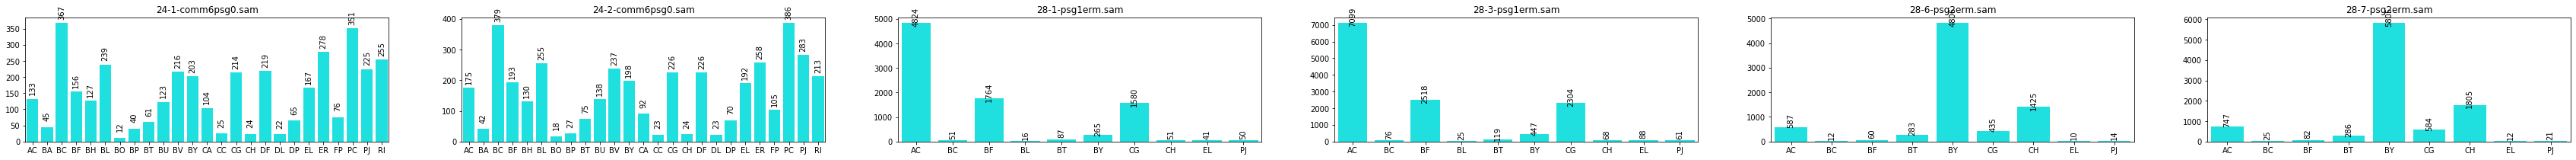

In [106]:
#plot the relative abundance of the species as a bar plot to include with the heatmap
fig, axs = plot.subplots(1, len(dfs), figsize = (10*len(dfs), 3))

#fig.tight_layout()

for i in range(len(dfs)):
    ax = axs[i]
    data = summary[i]["num_cells"]
    plots = sns.barplot(data.index, data.values, color = "cyan", ax = ax)
    ax.set_title(files[i])
    
    # Iterrating over the bars one-by-one
    for bar in plots.patches:

      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        plots.annotate(format(bar.get_height(),'n'),
                       (bar.get_x() + bar.get_width() / 2,
                        (bar.get_height()+15)), rotation = 90, ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
fig.savefig("relabun-bar.svg", format = "svg")

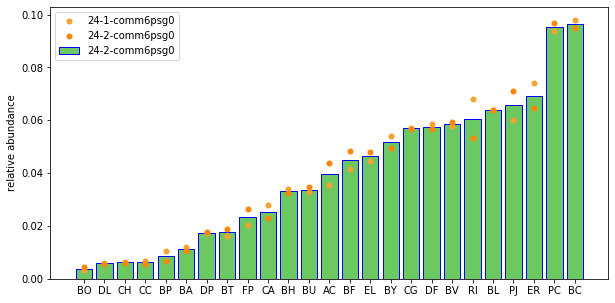

In [105]:
#relative abundances of species by pure barcode groups
fig, ax = plot.subplots(1,1, figsize = (10, 5))
#fig.autofmt_xdate(rotation=45)

#sort the order by abudance (average)
alltables = pd.concat(summary[0:2])
allmeans = alltables.groupby(level = 0).mean()
sorted_index = allmeans.sort_values("num_cells", axis = 0).index

for i in [0,1]:
    table = summary[i]
    x = table["num_cells"]
    x = x.reindex(sorted_index, fill_value = 0)
    
    ax.plot(x.index, x/sum(x), linestyle = "", ms = 5, marker = "o", label = f"{prefix[i]}", color = cpallet[i+4])

#plot the average as a barplot
x = allmeans["num_cells"]
ax.bar(x.index, x/sum(x), alpha = 1, color = cpallet[i+6], linewidth = 1, edgecolor = "b", label = f"{prefix[i]}")

ax.legend()
ax.set_ylabel("relative abundance")
#ax.set_yscale("log")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
fig.savefig("rel-abun-stock.svg", format = "svg")

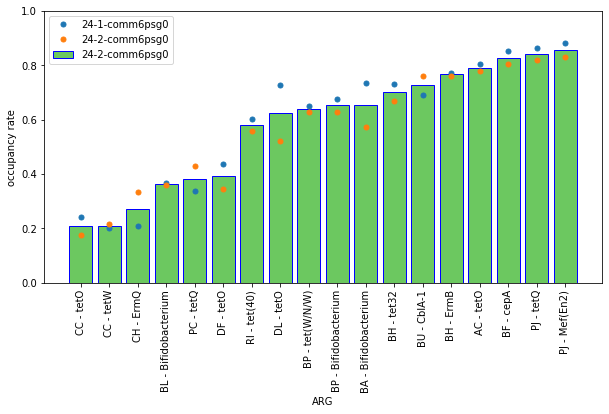

In [126]:
#plot each ARG/Species condition separately, for the glycerol stock duplicates
fig, axs = plot.subplots(1,1, figsize = (10, 5))

#sort the order by abudance (average) 
alltables = pd.concat(summary[0:1]) #only the first 2 libraries are the glycerol stock libraries we wanna make a plot of
allmeans = alltables.groupby(level = 0).mean()
sorted_index = allmeans.sort_values("num_cells", axis = 0).index

data = []
for i in [0,1]:
    #ARG occupancy per ARG, barplot
    table = summary[i].drop("num_cells", axis = 1)
    #get data for each point
    names = []
    values = []
    for j, row in table.iterrows():
        for idx in row.index:
            if row[idx] > 0.05: #only do for substantial instances (10% occupancy at least)
                names.append(str(j)+" - "+str(idx))
                values.append(row[idx])
    #store as a dataframe
    data.append(pd.DataFrame(values, index = names))

#get the sorted indices to plot in order
sorted_index = pd.concat(data).groupby(level = 0).mean().sort_values(0).index

#plot a barplot for the average of the data
#plot the average as a barplot
x = pd.concat(data).groupby(level = 0).mean()
x = x.reindex(sorted_index)
axs.bar(x.index, x[0], color = cpallet[i+6], linewidth = 1, edgecolor = "b", label = f"{prefix[i]}")

#plot the individual datapoints
for i in [0,1]:
    d = data[i].reindex(sorted_index)
    axs.plot(d.index, d.values, linestyle = "", ms = 10, marker = ".", label = f"{prefix[i]}")
axs.tick_params(axis='x', labelrotation = 90)
axs.set_ylabel("occupancy rate")
axs.set_xlabel("ARG")
axs.set_ylim((0, 1))

axs.legend()


fig.savefig("psgARGxSpecies.svg", format = "svg")
